In [1]:
%matplotlib inline

# MNIST 실습

## CNN
- Step 1. MNIST 데이터셋 가져오기
- Step 2. Keras로 CNN 구성하기
- Step 3. Train 데이터로 학습하기
- Step 4. Test 데이터로 성능평가

MNIST 데이터셋은 얀 르쿤 교수님의 홈페이지에서 받을 수 있습니다.   
http://yann.lecun.com/exdb/mnist/

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_1.png" >

이 MNIST 데이터셋을 사용한 분류기(Classifier)들의 성능도 게시되어 있습니다.   
DNN으로는 `0.35`까지, CNN으로는 `0.23`까지 오류를 줄일 수 있었네요

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_2.png" >

MNIST 데이터셋은 총 6만 개의 학습(Train) 셋과 1만 개의 테스트(Test) 셋으로 구성되어 있습니다.

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_3.png" >

데이터셋의 내부에는 아래와 같은 포맷으로 작성되어 있습니다.

<img src="https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/MNIST_4.png" >

하지만 우리는 Keras의 데이터셋 함수를 이용해서 더 쉽게 이용해 보겠습니다! ^^

## 파이썬 라이브러리 불러오기

사용할 라이브러리들을 불러옵니다.

In [2]:
import numpy as np                   # 수치 연산 라이브러리
import matplotlib.pyplot as plt      # 그림 그리는 라이브러리
import random                        # 무작위 숫자 생성을 위해 임포트

from keras.datasets import mnist     # MNIST 데이터셋을 불러오기 위한 보조 함수
from keras.models import Sequential  # Keras의 시퀀셜 모델

from keras.layers.core import Dense, Dropout, Activation # 모델에서 사용할 레이어 형태
from keras.utils import np_utils                         # 넘파이 관련한 도구들

## 데이터셋 불러오기

Keras의 datasets를 이용해 MNIST 데이터셋을 불러오겠습니다.

In [3]:
# MNIST 데이터는 60,000개(28x28 pixel)의 학습 이미지와 10,000개(28x28pixel)의 테스트 이미지로 구성되어 있습니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train 데이터
print("X_train shape", X_train.shape)  # 이미지 데이터
print("y_train shape", y_train.shape)  # 레이블 데이터
# Test 데이터
print("X_test shape", X_test.shape)  # 이미지 데이터
print("y_test shape", y_test.shape)  # 레이블 데이터

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


불러온 데이터를 그림으로 한 번 그려보겠습니다.   
데이터가 많으니 무작위로 몇 개를 골라서 그려보겠습니다.   
셀을 다시 실행하면 또 다른 무작위 그림이 출력됩니다.

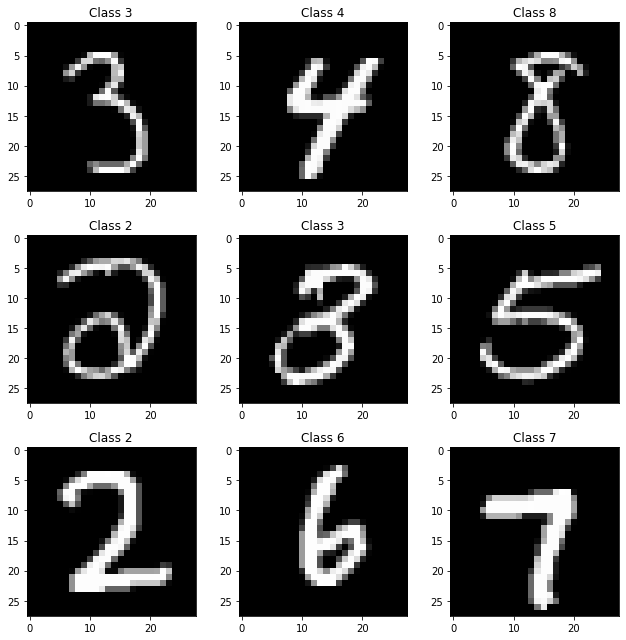

In [4]:
plt.rcParams['figure.figsize'] = (9,9)  # 그림의 사이즈를 정합니다

for i in range(9):
    plt.subplot(3,3,i+1)  # 그림이 그려질 위치를 정합니다
    num = random.randint(0, len(X_train))  # 그림을 그릴 대상 데이터셋을 무작위로 정합니다
    plt.imshow(X_train[num], cmap='gray', interpolation='none')  # 이미지를 그립니다
    plt.title("Class {}".format(y_train[num]))  # 이미지에 제목을 글자로 표시합니다
    
plt.tight_layout()  # 간격을 좁혀서 그림을 그립니다

이미지 말고 배열로도 그려보겠습니다

In [5]:
# 행렬을 출력할 함수를 만듭니다
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [6]:
num = 1000  # 그림을 그릴 데이터셋 번호를 지정합니다
matprint(X_train[num])  # 행렬을 출력 합니다
print("==========\n정답 :", y_train[num])

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0   36  146  254  255  251   95    6   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    3   97  234  254  254  232  254  254   35   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0   89  140  254  254  174   67   33  200  254  190   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0  108  253  254  235   51    1    0    0   12  254  253  56  0  0  0  0  0  0  
0

각 픽셀은 8bit 정수이며, 0부터 255 사이의 값을 갖습니다.   
이미지에서 숫자 `0`은 검정, 숫자 `255`는 하양을 표현합니다.

이것을 싱글-채널 픽셀이라고 부르며, 단색(monochrome)이라고 합니다.

# 합성곱 (콘볼루션, Convolution)

CNN에서는 이미지의 특징들(곡률, 가장자리 등)을 신경망에 입력하고 신경망이 이미지 분류에 중요한 특징을 학습할 수 있도록 합니다.   
특징 입력을 위해서 합성곱(Convolution)을 사용할 겁니다.   
합성곱은 커널(kernel or filter)를 적용해서 특징맵(feature map)을 생성합니다.

<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/CNN/convolution.gif' >

위의 예에서 이미지는 5x5 행렬이고 여기에 합성곱을 할 커널은 3x3 행렬입니다.   
내적(dot product) 연산이 이미지와 커널 사이에서 발생하고 합성곱 된 특징맵이 만들어 집니다.   
CNN의 각 커널은 이미지의 다른 특성을 학습합니다.   

커널은 사진 편집 소프트웨어에서 흐림(blur), 가장자리 감지(edge detection), 선명화(sharpening) 등을 적용하는 데 자주 사용됩니다.   
아래 표에서 필터의 값을 한 번 확인해 보세요.

https://en.wikipedia.org/wiki/Kernel_(image_processing)

<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/CNN/kernels.png' >

여러 개의 커널(kernel or filter) 중 하나를 선택해서 직접 합성곱을 해보겠습니다.   
이미지는 숫자를 입력해서 하나 만들어 보죠!

In [115]:
image = np.array([
    [  0,   0, 255,   0,   0],
    [  0, 200,   0, 200,   0],
    [150,   0,   0,   0, 150],
    [  0, 100,   0, 100,   0],
    [  0,   0,  50,   0,   0]
])

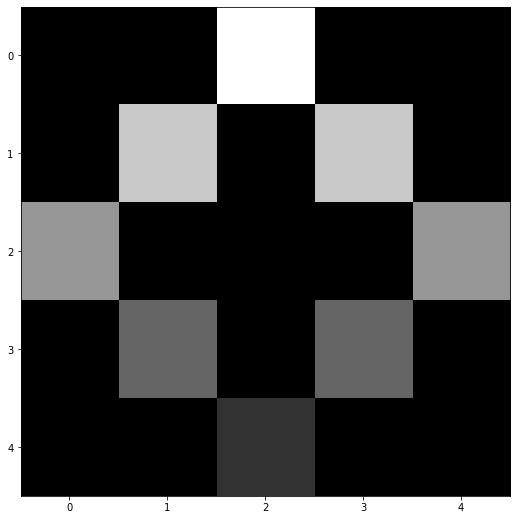

In [116]:
plt.imshow(image, cmap='gray')

커널은 `Identity`를 사용해 볼께요.   
이 커널은 합성곱을 해도 이미지 그 자체가 그대로 나오는 항등 함수를 의미합니다

In [117]:
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0],
])

합성곱 연산은 옆으로 이동하면서 내려가면서 계산을 해야 하는데,   
직접 함수를 만들면 복잡하니 라이브러리 `scipy`의 신호 모듈에 들어 있는 `convolve2d` 함수를 쓰겠습니다.

In [118]:
from scipy import signal

[[200   0 200]
 [  0   0   0]
 [100   0 100]]


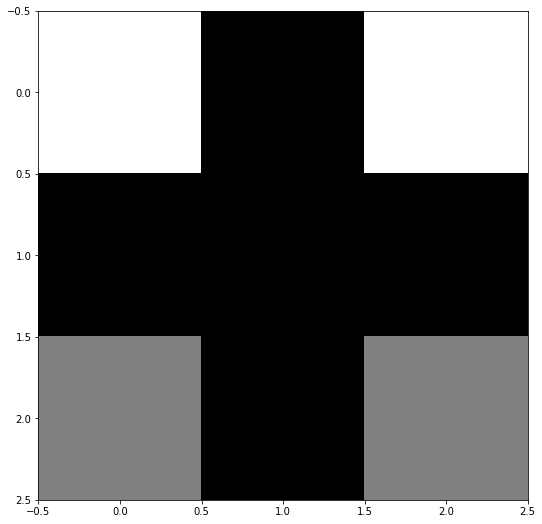

In [119]:
result = signal.convolve2d(image, kernel, 'valid')
print(result)
plt.imshow(result, cmap='gray');

우리가 만들었던 이미지는 5x5 행렬이었는데,   
3x3 행렬 크기로 줄어들었습니다.   

왜 그럴까요?

<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/CNN/conv.gif' >

만약 이미지가 원래 크기를 유지하려 한다면, 패딩을 넣어주어야 합니다.   
패딩은 `numpy`의 `pad` 함수를 사용해서 해보겠습니다.

In [121]:
# 상하좌우 모두 1개 행/열 0으로 패딩합니다
image_padding = np.pad(image, ((1,1),(1,1)), 'constant', constant_values=0)

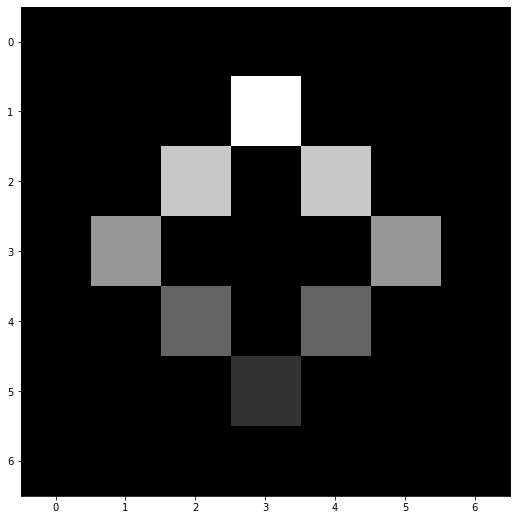

In [122]:
plt.imshow(image_padding, cmap='gray')

상하좌우로 1개의 빈칸이 늘어난 것을 볼 수 있습니다!   
이제 이 행렬에 합성곱을 해볼께요.

[[  0   0 255   0   0]
 [  0 200   0 200   0]
 [150   0   0   0 150]
 [  0 100   0 100   0]
 [  0   0  50   0   0]]


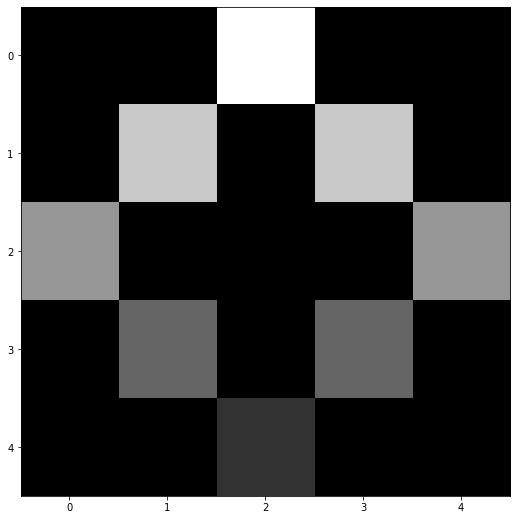

In [45]:
result = signal.convolve2d(image_padding, kernel, 'valid')
print(result)
plt.imshow(result, cmap='gray');

이미지 원래 크기 그 자체로 합성곱이 된 것을 확인할 수 있습니다!

이번에는 여러 커널(filter) 중 가장자리 감지를 사용해 보겠습니다.   
numpy `array`로 만들어 주세요.

In [124]:
# Edge detection
kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

[[-200 -455 1640 -455 -200]
 [-350 1195 -655 1195 -350]
 [ 900 -450 -600 -450  900]
 [-250  600 -250  600 -250]
 [-100 -150  200 -150 -100]]


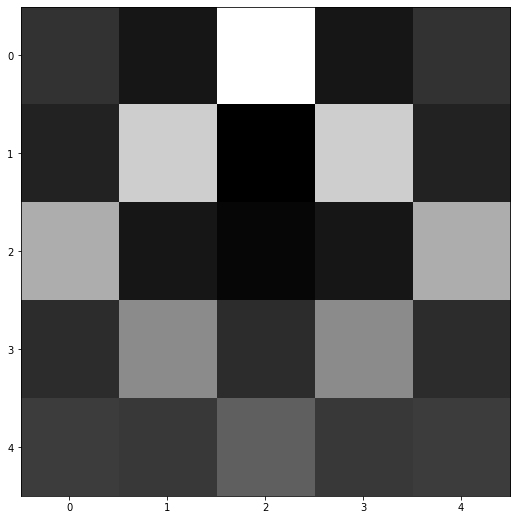

In [125]:
result = signal.convolve2d(image_padding, kernel, 'valid')
print(result)
plt.imshow(result, cmap='gray');

이미지 크기가 작다 보니 눈에 띄지 않는 것 같아요.   
실제 이미지를 한 번 불러오죠!

In [52]:
new_img = plt.imread("static/CNN/IU.png")

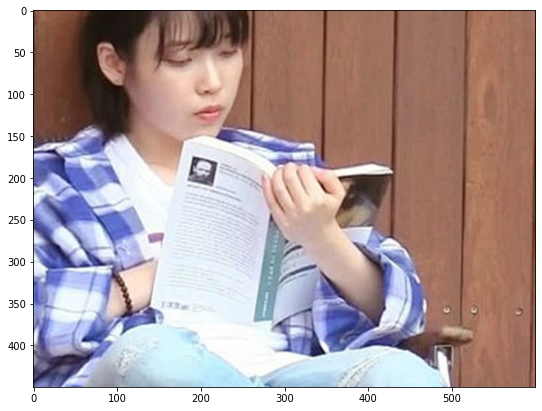

In [54]:
plt.imshow(new_img);

입력한 이미지는 4개의 차원을 가지고 있네요. 그건 Alpha 값이 더 들어 있어서 그렇습니다.   
3개의 RGB 색 행렬에 4번째 알파 채널이 추가되어 있습니다. 알파는 각 화소가 얼마나 투명한지를 나타내는 값이며, 이미지의 투명 채널을 PNG가 지원하기 때문에 추가되었습니다.   

RGBA 색 공간 : https://ko.wikipedia.org/wiki/RGBA_%EC%83%89_%EA%B3%B5%EA%B0%84

In [73]:
new_img.shape  # RGB+A(lpha)

(450, 600, 4)

각 색공간을 한 번 그려보겠습니다.

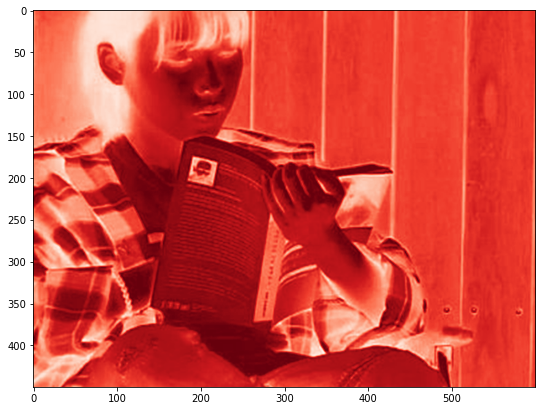

In [126]:
plt.imshow(new_img[:,:,0], cmap='Reds')

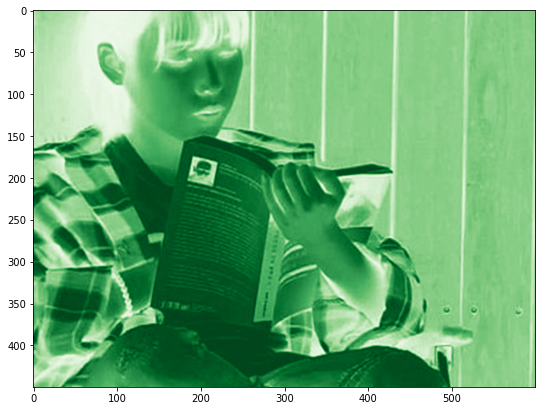

In [127]:
plt.imshow(new_img[:,:,1], cmap='Greens')

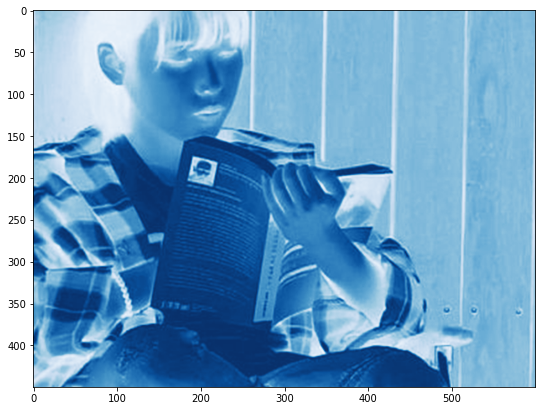

In [128]:
plt.imshow(new_img[:,:,1], cmap='Blues')

이 중에 R 공간에 대한 행렬만 가지고 합성곱을 해볼께요.

[[-1.92156851e-01 -3.52942050e-02  1.33333415e-01 ...  1.17647052e-02
   6.66666627e-02  8.23529363e-02]
 [-1.76470578e-01 -1.56863630e-02  1.21568710e-01 ...  1.96078420e-02
   5.88235259e-02  9.41176414e-02]
 [-1.64705873e-01 -8.94069672e-08  1.41176552e-01 ...  2.74509788e-02
   8.23529363e-02  7.05882311e-02]
 ...
 [ 3.92157435e-02  7.05882460e-02  8.62745047e-02 ...  1.96078420e-02
   5.49019575e-02 -3.92156839e-03]
 [-2.35293806e-02  5.88235259e-02  7.45097995e-02 ... -3.92156839e-03
   7.05882311e-02  6.27450943e-02]
 [ 3.13725621e-02  5.09803891e-02  7.84313679e-03 ... -1.17647052e-02
   7.05882311e-02  7.84313679e-02]]


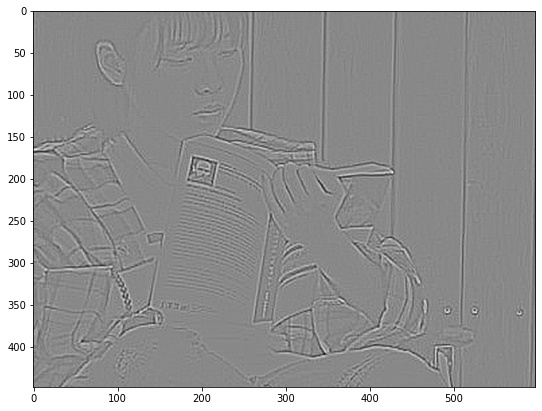

In [129]:
result = signal.convolve2d(new_img[:,:,0], kernel, 'valid')
print(result)
plt.imshow(result, cmap='gray');

가장자리가 잘 추출되는 걸 볼 수 있습니다!

이번엔 다른 필터를 적용해 볼까요?   
**흐림**(blur)과 **선명화**(sharpen)을 해보겠습니다

In [130]:
# Box blur
kernel = 1/9*np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

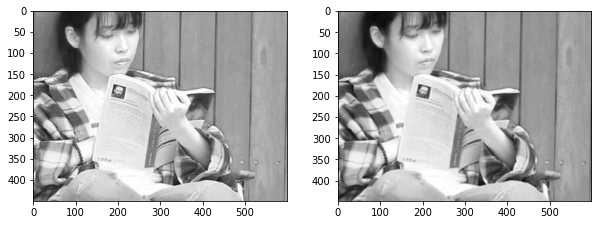

In [131]:
result = signal.convolve2d(new_img[:,:,0], kernel, 'valid')

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(new_img[:,:,0], cmap='gray');
axs[1].imshow(result, cmap='gray');

In [106]:
# Sharpen
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

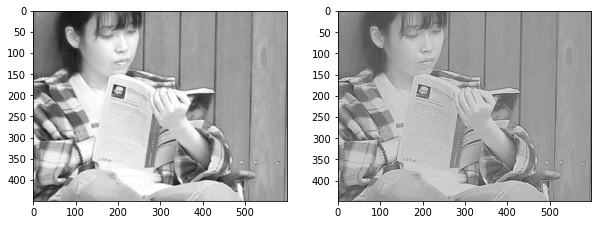

In [107]:
result = signal.convolve2d(new_img[:,:,0], kernel, 'valid')

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(new_img[:,:,0], cmap='gray');
axs[1].imshow(result, cmap='gray');

CNN에서 사용하는 커널은 위에서 사용한 커널들을 사용할 수도 있지만, 보통 최대 풀링(Max pooling) 같은 방법을 사용합니다.   
**최대 풀링**은 가장 큰 값을 남기는 방식을 말합니다.
이는 작은 값 요소가 각 특징 맵에서 삭제되어 중요할 수 있는 부분만을 남기고 학습할 매개 변수 수를 줄이며 계산 비용(예 : 시스템 메모리)을 줄이는 효과가 있습니다.

<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/CNN/max_pooling.png' >

컨볼루션의 컨볼루션을 취할 수도 있으며, Keras를 이용해 컨볼루션 층을 깊게 한 번 쌓아보도록 하죠!

<img src = 'https://raw.githubusercontent.com/CoreDotToday/DeepLearningTextBook/main/MNIST/static/CNN/go_deeper.jpg' >

## 깊은 CNN 만들기

In [141]:
# 이미지 처리에 필요한 도구들 불러오기
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

In [168]:
# MNIST 데이터는 60,000개(28x28 pixel)의 학습 이미지와 10,000개(28x28pixel)의 테스트 이미지로 구성되어 있습니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train 데이터
print("X_train shape", X_train.shape)  # 이미지 데이터
print("y_train shape", y_train.shape)  # 레이블 데이터
# Test 데이터
print("X_test shape", X_test.shape)  # 이미지 데이터
print("y_test shape", y_test.shape)  # 레이블 데이터

X_train = X_train.reshape(60000, 28, 28, 1) # 싱글 채널임을 표현하는 한 차원을 추가
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # 손쉬운 정규화를 위해서 integer 형태를 float32로 변환
X_test = X_test.astype('float32')

X_train /= 255                              # 각 픽셀의 값을 255로 나누어 [0-1] 값으로 정규화
X_test /= 255

print("학습 행렬 모양 :", X_train.shape)
print("테스트 행렬 모양", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
학습 행렬 모양 : (60000, 28, 28, 1)
테스트 행렬 모양 (10000, 28, 28, 1)


In [170]:
# 레이블 데이터를 원-핫 포맷 클래스로 변환

nb_classes = 10 # 클래스(숫자)의 총 개수

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Sequential()로 모델을 쌓아보겠습니다.

In [171]:
model = Sequential()                                 # 층을 선형으로 쌓겠습니다

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 출력의 차원(dim)=32, 커널 크기=3x3 -- 32개의 특징 맵이 만들어 집니다
model.add(BatchNormalization(axis=-1))               # 활성화 함수 전에 특징 맵을 정규화 합니다
convLayer01 = Activation('relu')                     # 활성화 함수
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 출력의 차원(dim)=32, 커널 크기=3x3 -- 32개의 특징 맵이 만들어 집니다
model.add(BatchNormalization(axis=-1))               # 활성화 함수 전에 특징 맵을 정규화 합니다
model.add(Activation('relu'))                        # 활성화 함수
convLayer02 = MaxPooling2D(pool_size=(2,2))          # 2x2 커널 사이즈의 맥스 풀링
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 출력의 차원(dim)=64, 커널 크기=3x3 -- 64개의 특징 맵이 만들어 집니다
model.add(BatchNormalization(axis=-1))               # 활성화 함수 전에 특징 맵을 정규화 합니다
convLayer03 = Activation('relu')                     # 활성화 함수
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 출력의 차원(dim)=64, 커널 크기=3x3 -- 64개의 특징 맵이 만들어 집니다
model.add(BatchNormalization(axis=-1))               # 활성화 함수 전에 특징 맵을 정규화 합니다
model.add(Activation('relu'))                        # 활성화 함수
convLayer04 = MaxPooling2D(pool_size=(2,2))          # 2x2 커널 사이즈의 맥스 풀링
model.add(convLayer04)
model.add(Flatten())                                 # FC하기 위해 평활화. 4x4x64 행렬은 1024길이의 벡터가 됩니다

# Fully Connected Layer 5
model.add(Dense(512))                                # 512개의 FCN(Fully connected networks) 노드
model.add(BatchNormalization())                      # 정규화
model.add(Activation('relu'))                        # 활성화 함수

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% 랜덤하게 선택된 노드를 드랍아웃
model.add(Dense(10))                                 # 마지막 10개의 클래스로 FCN
model.add(Activation('softmax'))                     # 소프트맥스 활성화 함수

In [172]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)       

In [173]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

하나의 테크닉으로 **데이터 증강(Data Augmentation)**을 수행하겠습니다.   
데이터 증강은 데이터를 무작위로 약간 변경하여 과적합(overfitting)을 방지합니다.   
Keras에는 자동 증강을 수행하는 훌륭한 내장(built-in) 기능이 있습니다.

In [174]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

만약 이미지의 양이 많다면, 제너레이터 형식으로 데이터를 입력시킬 수 있습니다.   
메모리에 모두 올려서 쓰는 것이 아니라 사용할 때 로드하여 사용하는 방식입니다. (이를 feeding 한다고 합니다)   
이 방법은 상당한 메모리 절약을 가져옵니다.   

참고자료 : https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

In [181]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

이 때 `steps_per_epoch`의 값은 샘플의 개수를 배치 사이즈로 나누어야 함을 잊지 마세요!
$$\biggl\lfloor\frac{\#\textrm{ samples}}{\textrm{batch size}}\biggr\rfloor$$

In [179]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128);

/Users/kyunghoon/anaconda3/envs/jupyter/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
468/468 [==============================] - 98s 180ms/step - loss: 0.2757 - accuracy: 0.9139 - val_loss: 0.1027 - val_accuracy: 0.9670
Epoch 2/5
468/468 [==============================] - 82s 176ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0834 - val_accuracy: 0.9717
Epoch 3/5
468/468 [==============================] - 83s 177ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0252 - val_accuracy: 0.9920
Epoch 4/5
468/468 [==============================] - 92s 197ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0277 - val_accuracy: 0.9905
Epoch 5/5
468/468 [==============================] - 92s 196ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0339 - val_accuracy: 0.9878


In [180]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 10ms/step - loss: 0.0340 - accuracy: 0.9877
Test score: 0.03401409462094307
Test accuracy: 0.9876999855041504


### 결과 살펴보기

In [221]:
# predict_classes 함수는 가장 높은 확률 클래스를 출력합니다
predicted_classes = model.predict_classes(X_test)

# 맞은 경우와 틀린 경우를 구분하여 인덱스(위치)를 저장하겠습니다
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

/Users/kyunghoon/anaconda3/envs/jupyter/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


- 정답인 경우

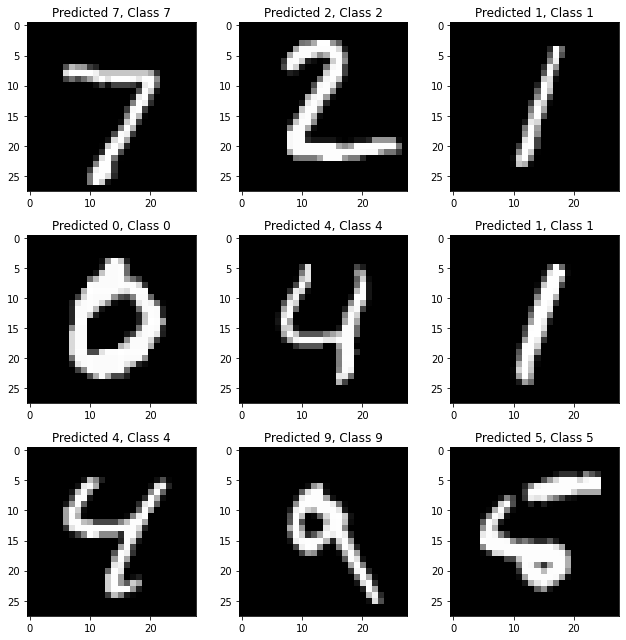

In [223]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

- 오답인 경우

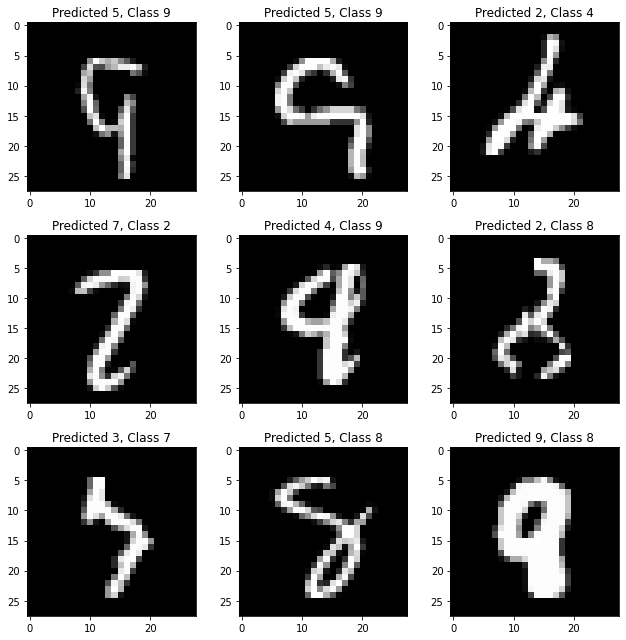

In [224]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

### 참고 자료
- https://github.com/wxs/keras-mnist-tutorial
- https://github.com/yashk2810/MNIST-Keras
- https://github.com/AviatorMoser/keras-mnist-tutorial